In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from src.data_processors import merge_data
from scripts.outlier_removal import plot_outliers_by_zscore,remove_outliers_zscore
from scripts.time_series_analysis import plot_time
from scripts.cleaning_analysis import plot_cleaning
from scripts.load_data import load_csv_file
from scripts.correlation_analysis import cor_solar_raditation_and_temprature, cor_solar_raditation_and_wind_coditions
from scripts.wind_analysis import wind_direction_and_speed_analysis
from scripts.temprature_analysis import relative_humidity_and_temprature_analysis
from scripts.histogram_analysis import histogram_analysis
from scripts.bubble_chart_analysis import bubble_chart_analysis
from scripts.remove_empty_values_with_mean import replace_empty_with_mean

In [3]:
files = {
    'benin-malanville.csv': 'Benin',
    'sierraleone-bumbuna.csv': 'Sierra Leone',
    'togo-dapaong_qc.csv': 'Togo'
}
output_filename = 'merged_data.csv'
preprocessed_data = load_csv_file('sierraleone-bumbuna.csv')
#preprocessed_data = merge_data(files, country_map=files, output_filename=output_filename)
print("Preprocessed Data Preview:")
print(preprocessed_data.head(10))  # 

Attempting to load file at: /workspaces/solar-farm-insights/data/sierraleone-bumbuna.csv
Preprocessed Data Preview:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
5  2021-10-30 00:06 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
6  2021-10-30 00:07 -0.7  0.0 -0.8   0.0   0.0  22.0  99.4  0.1     0.7   
7  2021-10-30 00:08 -0.7  0.0 -0.8   0.0   0.0  22.0  99.5  0.2     0.7   
8  2021-10-30 00:09 -0.7 -0.1 -0.8   0.0   0.0  22.0  99.5  0.7     1.1   
9  2021-10-30 00:10 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.6     1.1   

   WSstdev     WD  WDstdev      BP  Cleaning  Precipitatio

In [4]:
numeric_columns = preprocessed_data.select_dtypes(include=['int64', 'float64']).dropna(axis=1, how='all').columns
print(numeric_columns)
summary_stats = preprocessed_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns:")
print(summary_stats)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')
Summary Statistics for Numeric Columns:
               GHI         DNI         DHI        ModA        ModB       Tamb  \
mean    204.410587  164.707173   89.296783  229.654841  218.537855  25.872434   
median   -0.700000   -0.100000   -0.800000    0.700000    0.600000  24.900000   
std     296.815756  256.779204  126.301241  325.587239  311.084443   5.218879   

               RH        WS    WSgust   WSstdev          WD   WDstdev  \
mean    74.931501  1.034063  1.519402  0.345713  118.422395  7.037420   
median  81.200000  0.800000  1.400000  0.400000   80.000000  4.900000   
std     22.727547  1.102558  1.434368  0.269912  112.339964  7.928294   

                 BP  Cleaning  Precipitation      TModA      TModB  
mean     999.409936  0.000702       0.000752  33.031996  32.868370  
median  1000

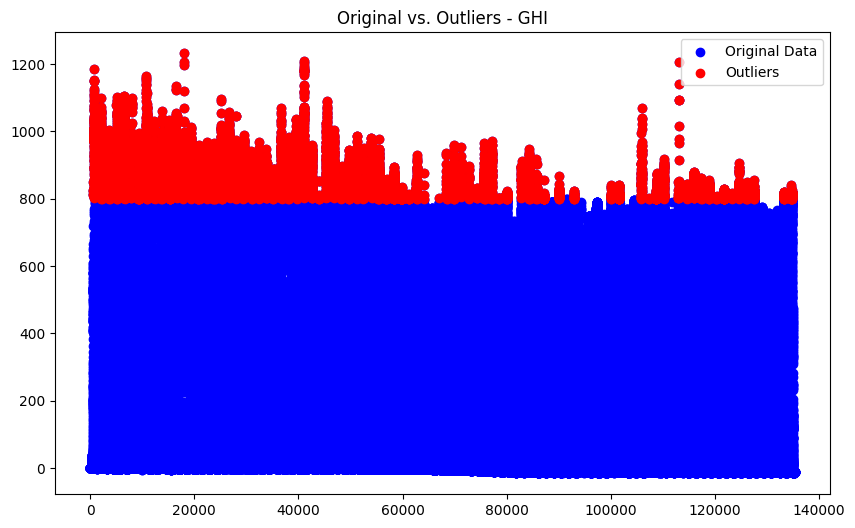

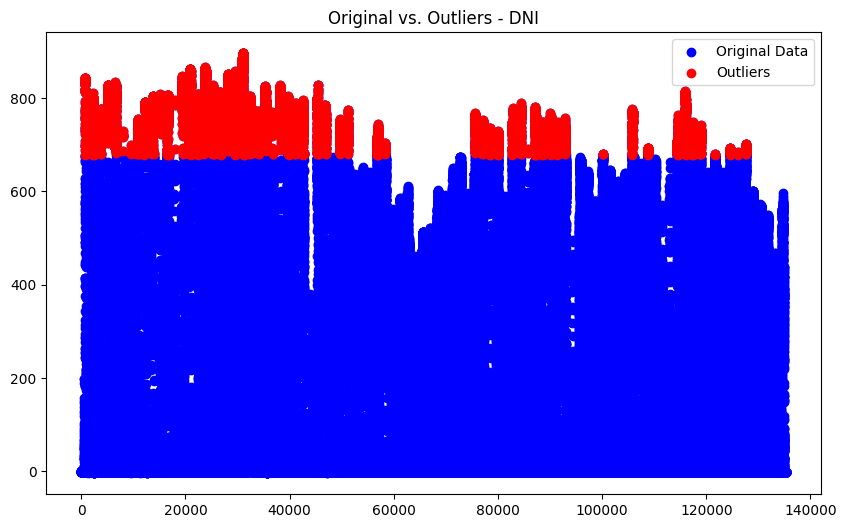

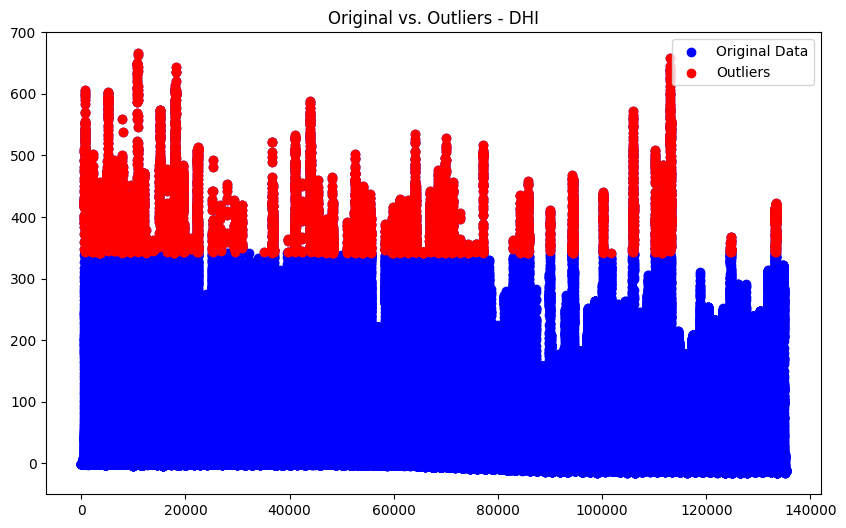

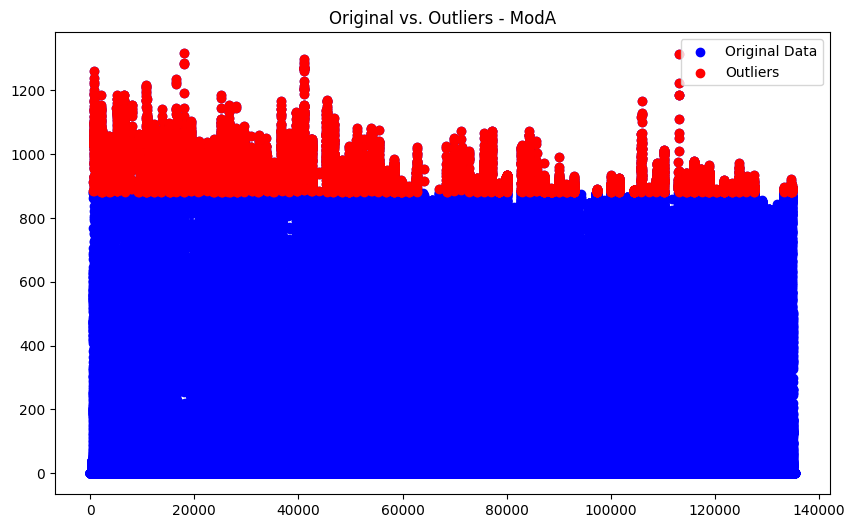

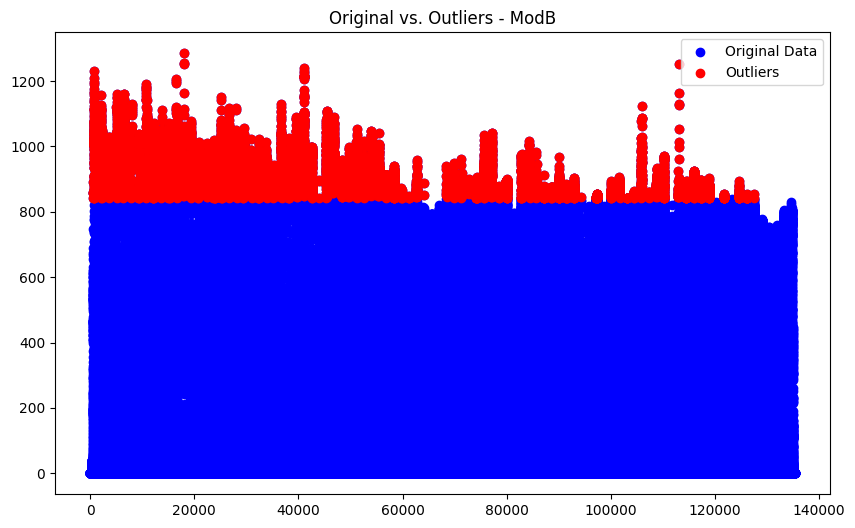

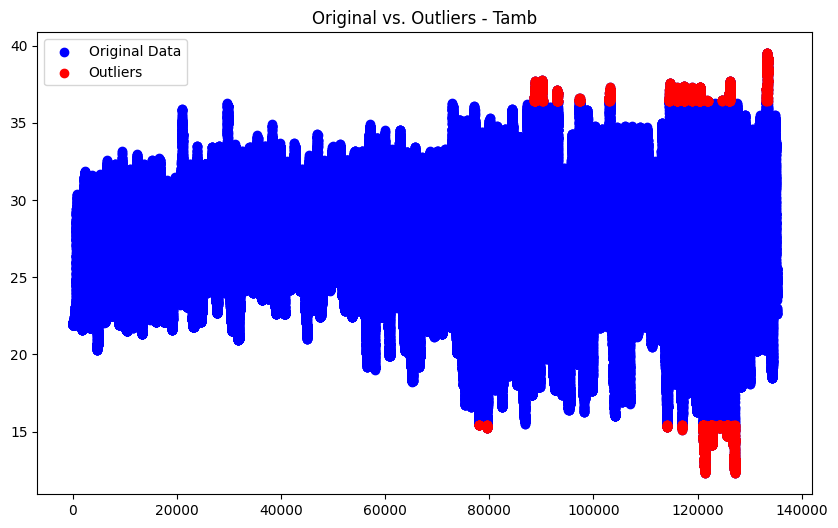

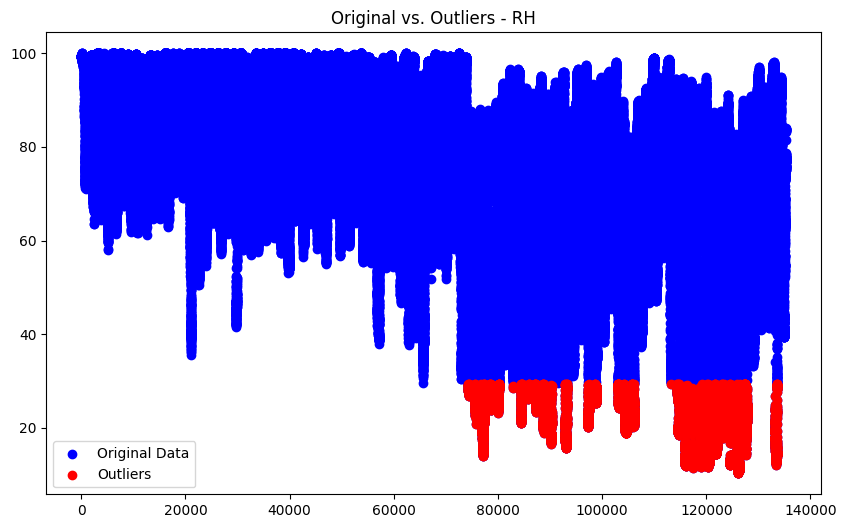

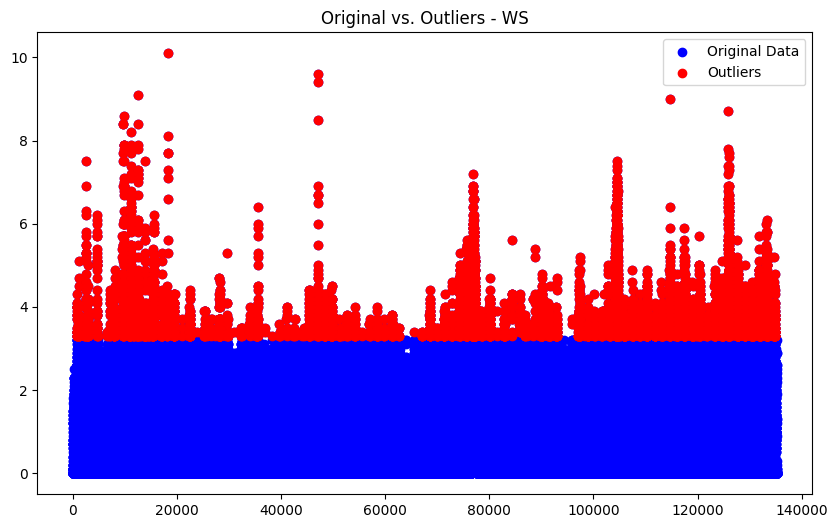

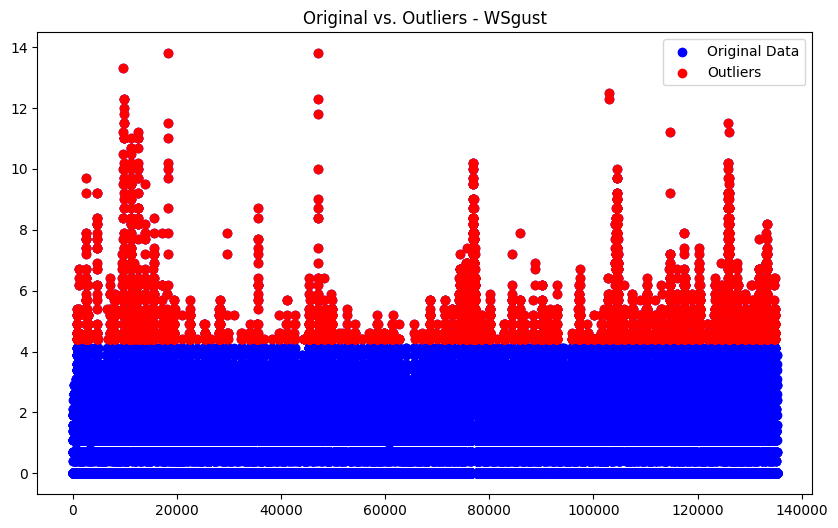

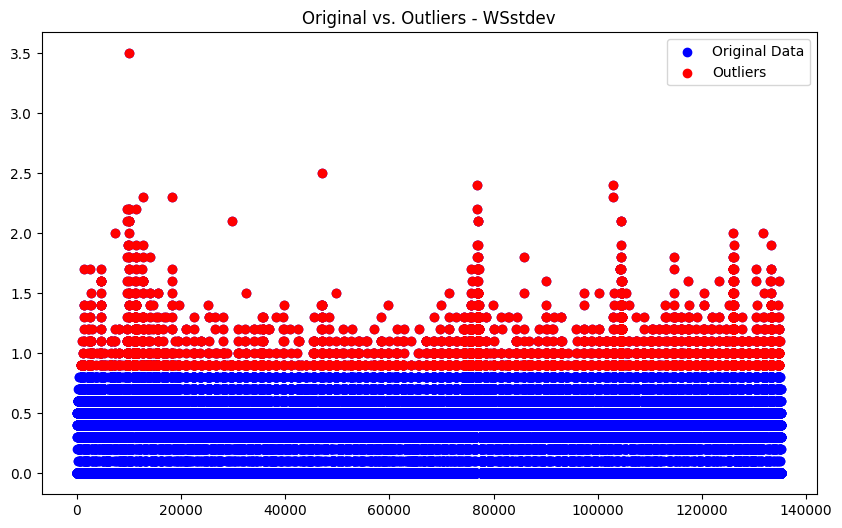

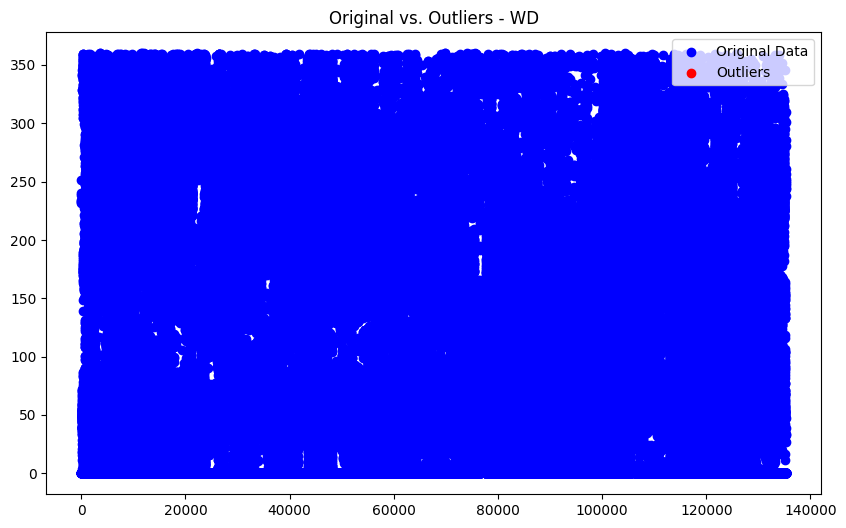

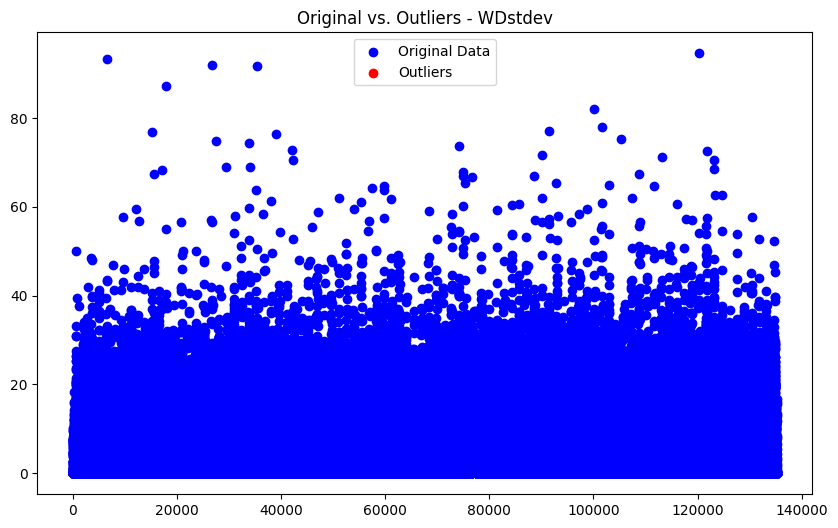

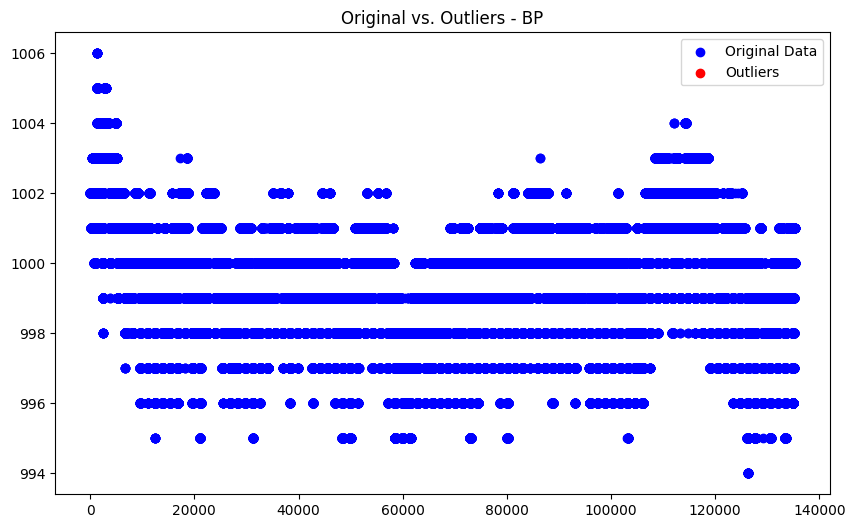

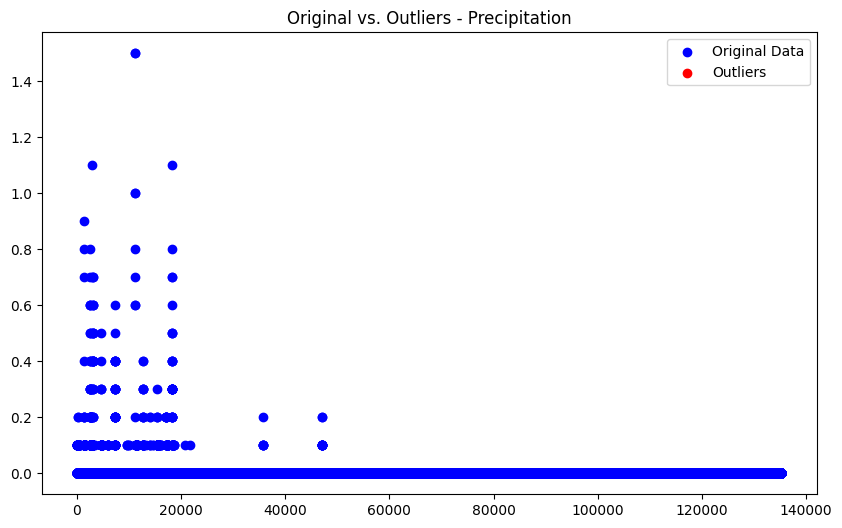

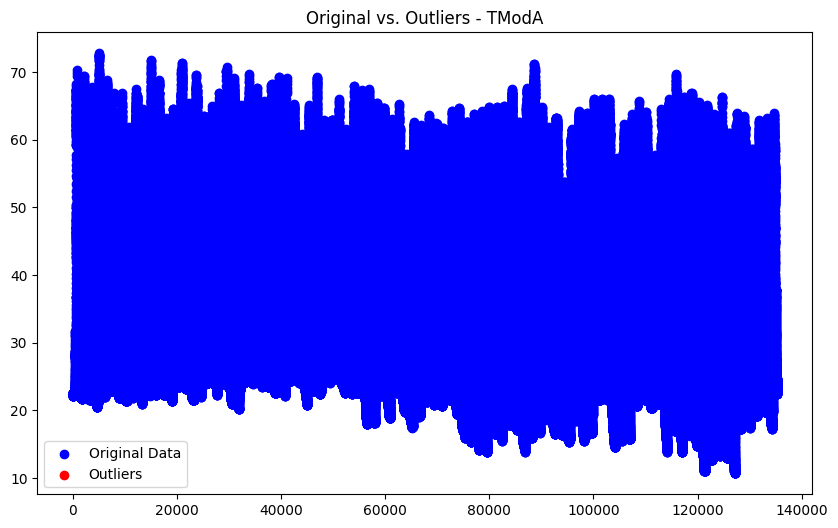

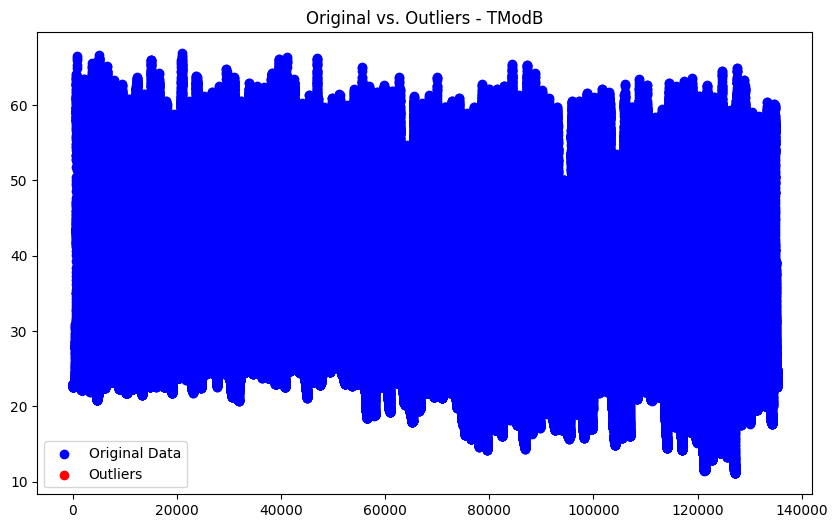

Column: GHI
Original Rows: 135283
Rows After Filtering: 127448
Removed Outliers: 7835

Column: DNI
Original Rows: 135283
Rows After Filtering: 117064
Removed Outliers: 18219

Column: DHI
Original Rows: 135283
Rows After Filtering: 109494
Removed Outliers: 25789

Column: ModA
Original Rows: 135283
Rows After Filtering: 101327
Removed Outliers: 33956

Column: ModB
Original Rows: 135283
Rows After Filtering: 93108
Removed Outliers: 42175

Column: Tamb
Original Rows: 135283
Rows After Filtering: 87523
Removed Outliers: 47760

Column: RH
Original Rows: 135283
Rows After Filtering: 82894
Removed Outliers: 52389

Column: WS
Original Rows: 135283
Rows After Filtering: 79197
Removed Outliers: 56086

Column: WSgust
Original Rows: 135283
Rows After Filtering: 76668
Removed Outliers: 58615

Column: WSstdev
Original Rows: 135283
Rows After Filtering: 75910
Removed Outliers: 59373

Column: WD
Original Rows: 135283
Rows After Filtering: 70802
Removed Outliers: 64481

Column: WDstdev
Original Rows: 13

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [5]:
cleaned_data = preprocessed_data.copy()
outlier_check_cols = ['ModA','ModB','WS','WSgust']
num_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA',
       'TModB']
plot_outliers_by_zscore(cleaned_data,num_cols,2)
cleaned_data = remove_outliers_zscore(cleaned_data,num_cols,2,False)
cleaned_data = replace_empty_with_mean(cleaned_data)
cleaned_data.to_csv("../cleaned_data.csv", index=False)
summary_stats = cleaned_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns After Outlier removal:")
print(summary_stats)

              GHI       DNI       DHI       Tamb
Month                                           
2021-10  5.225985  0.744261  5.069261  22.485149
2021-11  7.004715  4.857559  5.892405  23.958514
2021-12  4.266470  5.982193  3.150065  22.392320
2022-01 -2.116097  7.490600 -4.025337  21.030334


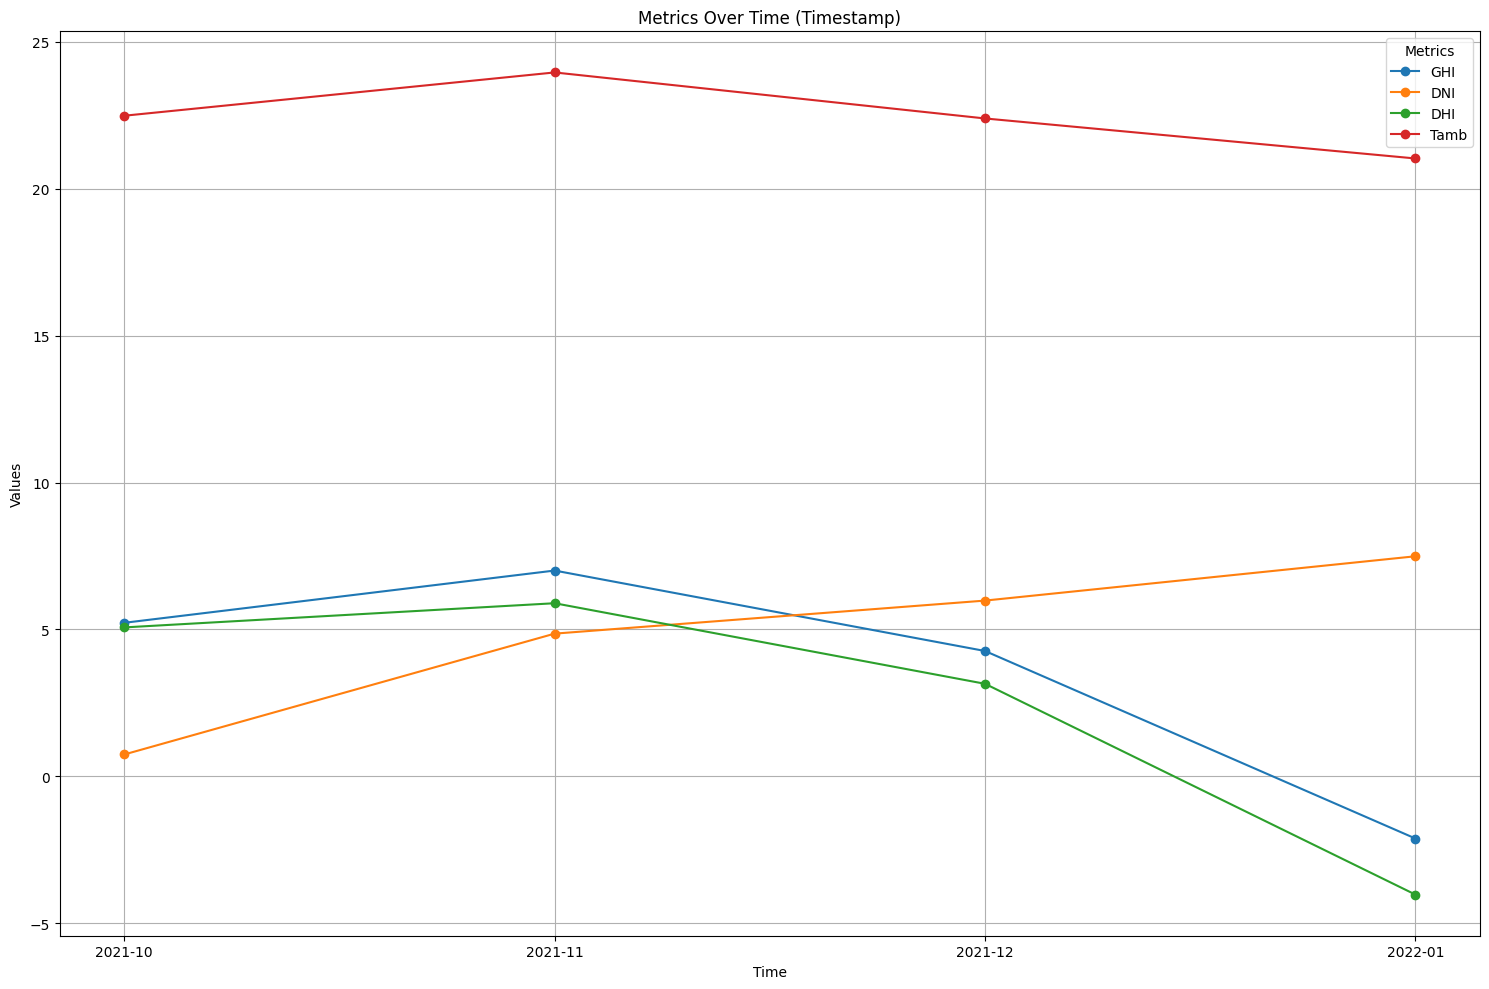

In [6]:
time_column = 'Timestamp'
ghi_metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
sensor_columns = ['ModA', 'ModB']
cleaning_column = 'Cleaning'

plot_time(cleaned_data, time_column, ghi_metrics)

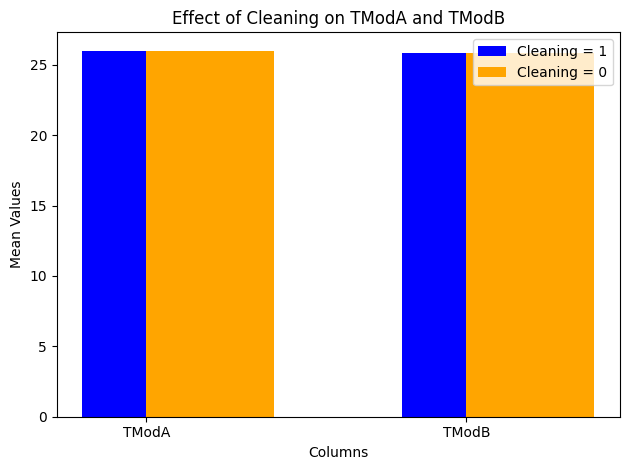

In [7]:
plot_cleaning(cleaned_data)

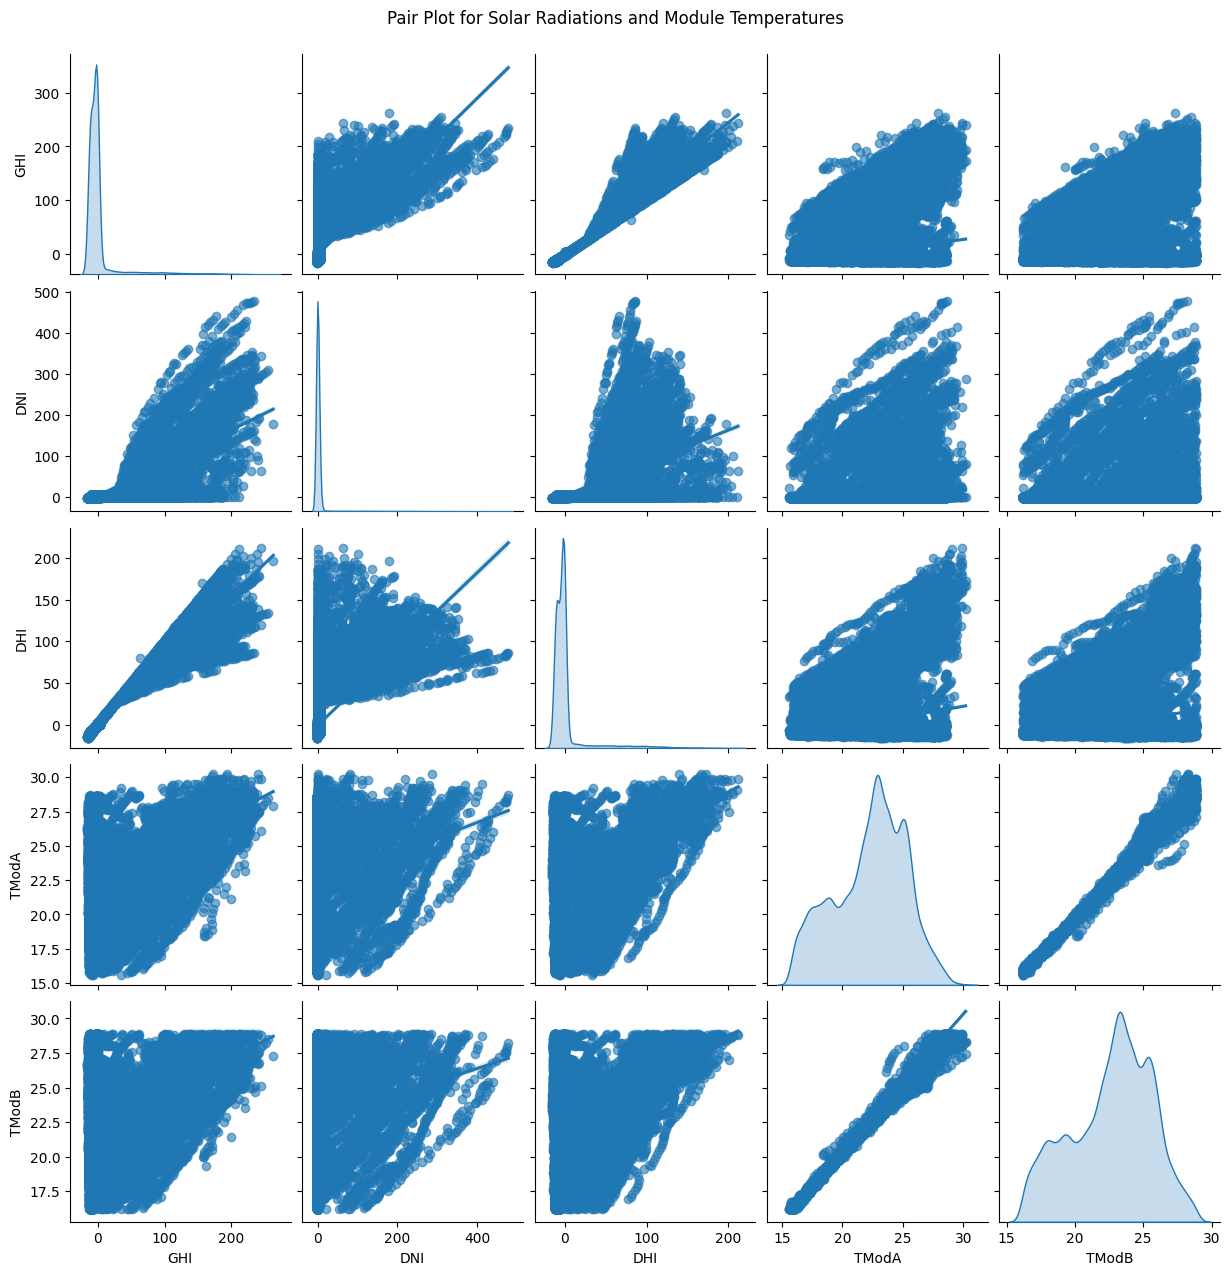

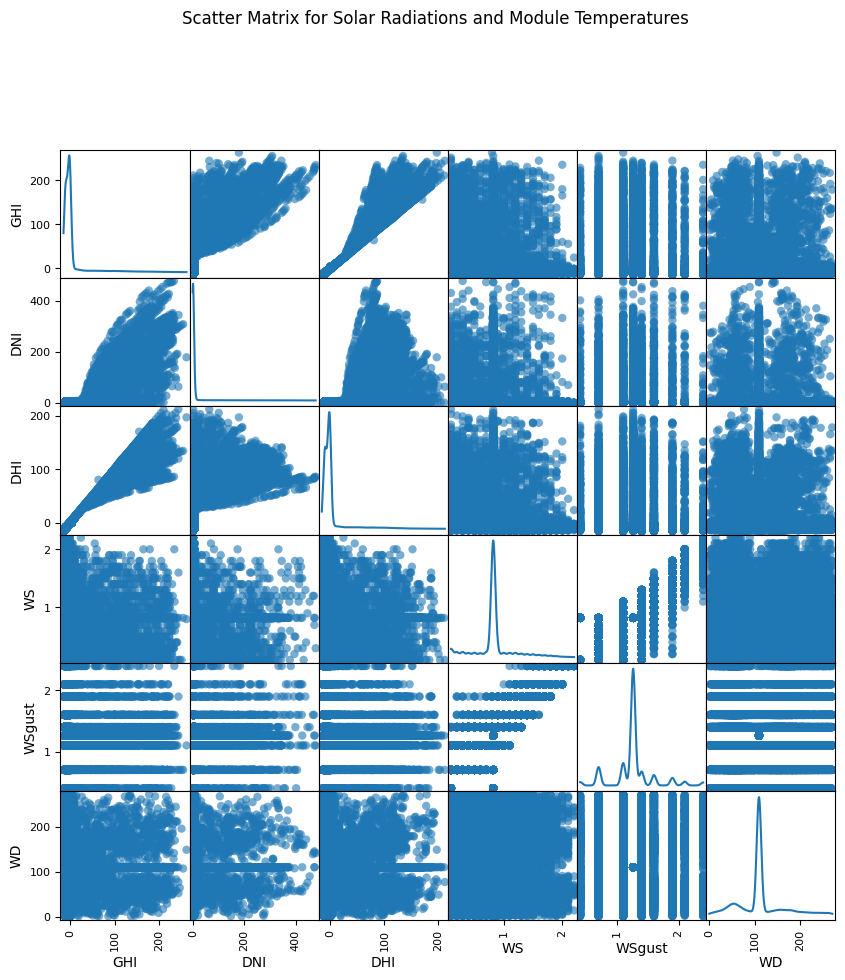

In [8]:
cor_solar_raditation_and_temprature(cleaned_data)
cor_solar_raditation_and_wind_coditions(cleaned_data)

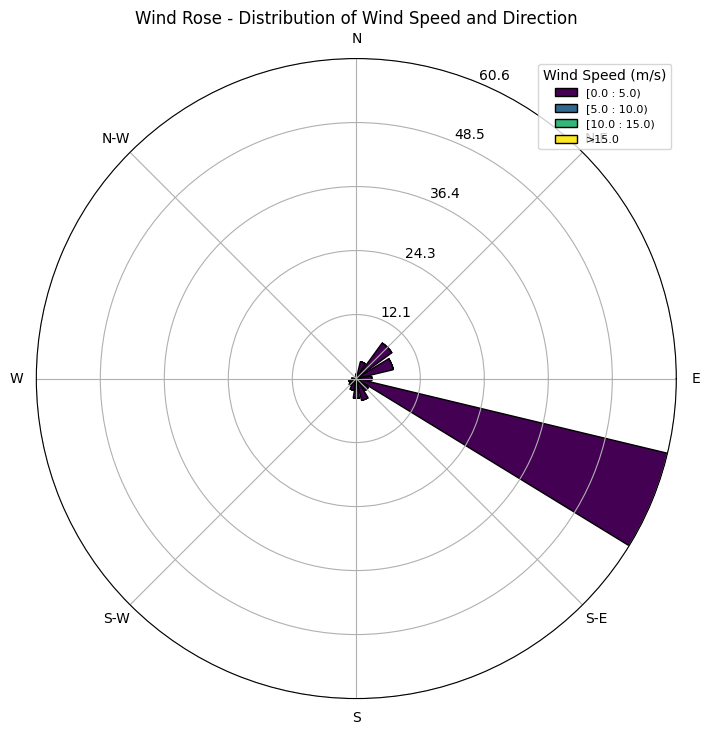

In [9]:
wind_direction_and_speed_analysis(cleaned_data)

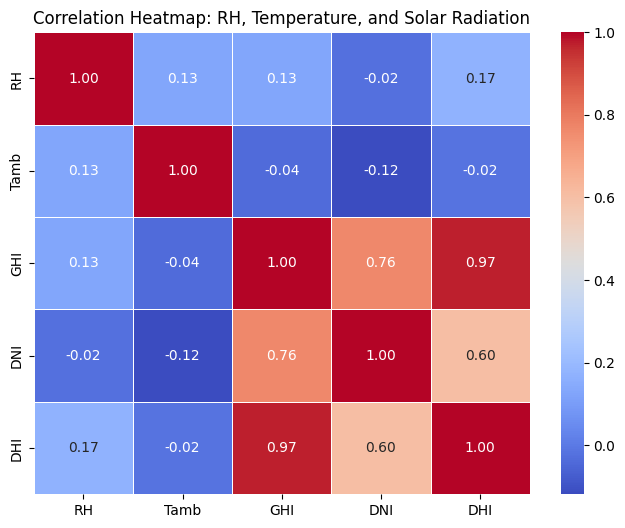

In [10]:
relative_humidity_and_temprature_analysis(cleaned_data)

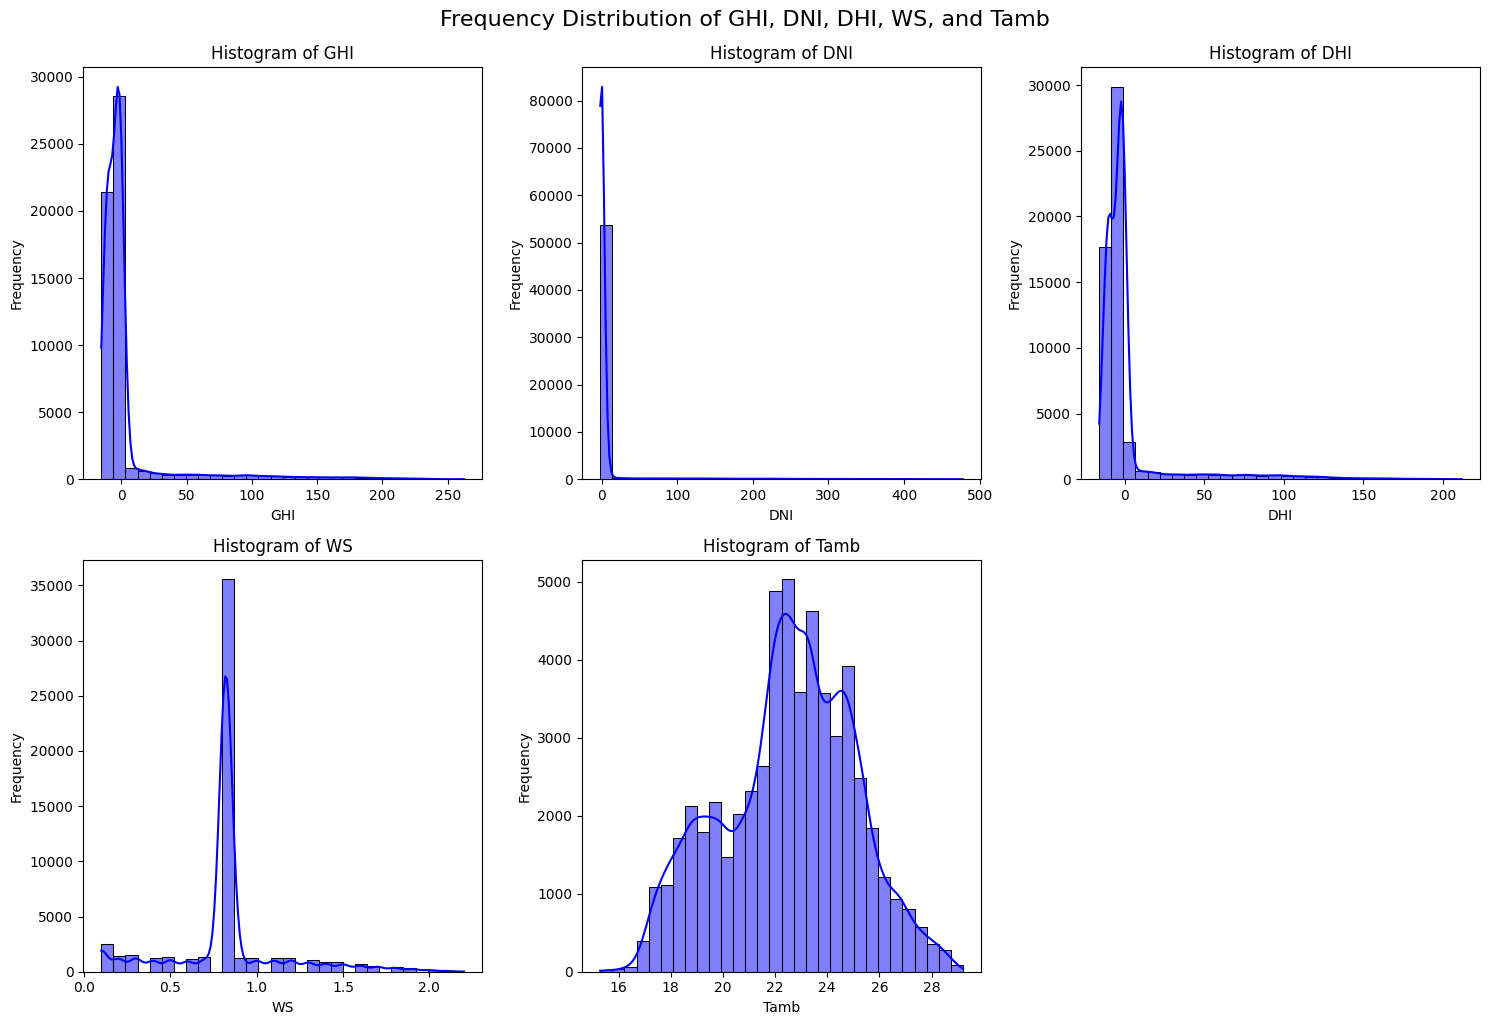

In [11]:
histogram_analysis(cleaned_data)

/workspaces/solar-farm-insights/scripts/bubble_chart_analysis.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('WS_Class').agg({


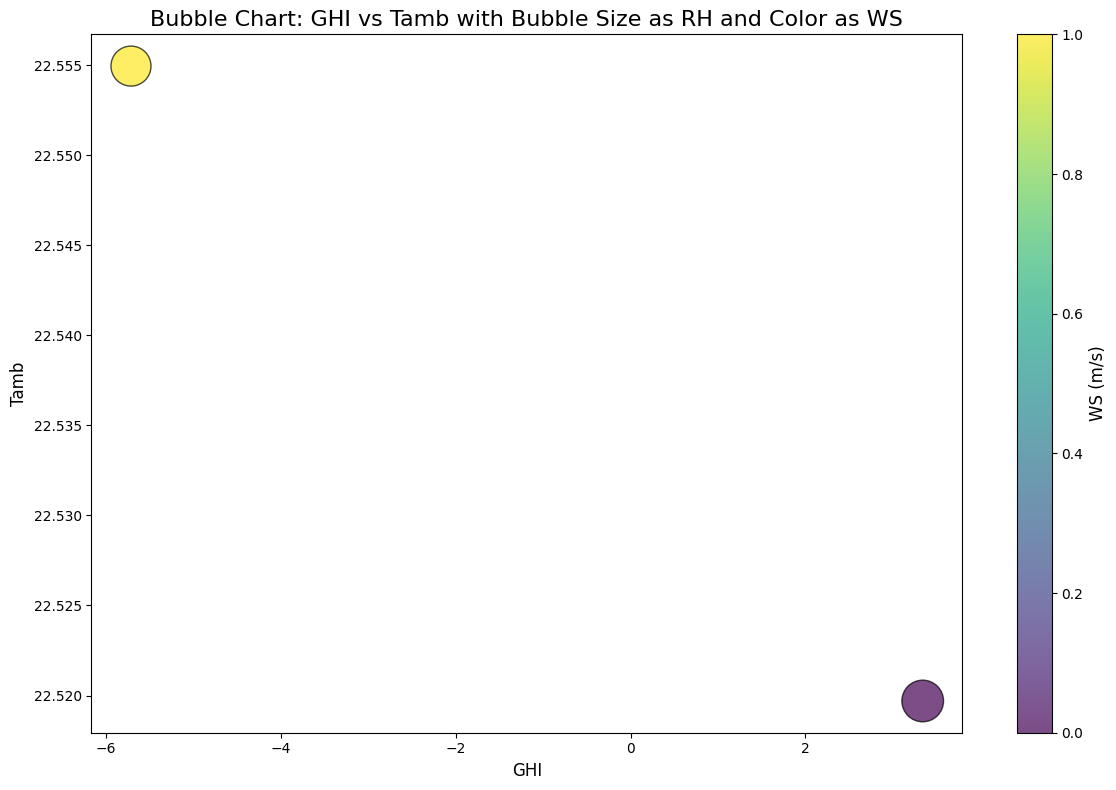

In [12]:
bubble_chart_analysis(cleaned_data)